In [1]:
from main import *

In [8]:
import matplotlib.pyplot as plt
from typing import Optional


def draw_point(m: Geo, label: Optional[str]=None):
    x, y = coords(m)
    plt.plot(x, y, 'ro')
    if label is not None:
        # plt.annotate(label, xy=(x, y))
        plt.annotate(label,
                xy=(x, y), xycoords='data',
                xytext=(4, 4), textcoords='offset points')
X_RANGE = (-3, 3)
Y_RANGE = (-10, 10)
def line(l: Geo) -> tuple[Geo, Geo]:
    l = l.normalize()
    mid = l.inv()*(l | O)
    dist = 3
    M = exp(dist*l*I)
    a = M * mid / M
    M = exp(-dist*l*I)
    b = M * mid / M
    return a, b
def draw_line(m: Geo, label: Optional[str]=None):
    A, B = line(m)
    x1, y1 = coords(A)
    x2, y2 = coords(B)
    plt.plot([x1, x2], [y1, y2])
    if label is not None:
        x, y = coords(m.inv() * (m | O))
        plt.annotate(label,
                xy=(x, y), xycoords='data',
                xytext=(4, 4), textcoords='offset points')
        

def draw_poly(ms: list[Geo], label: Optional[str]=None):
    xs = []
    ys = []
    for m in ms:
        x, y = coords(m)
        xs.append(x)
        ys.append(y)
    plt.fill(xs, ys, alpha=.5)

def draw(m: Geo | list[Geo], label: str | None = None) -> None:
    if isinstance(m, list):
        draw_poly(m)
    else:
        g = m.grade()
        if g == dim-1:
            draw_point(m, label)
        elif g == dim-2:
            draw_line(m, label)
        elif g == dim-3:
            assert False, 'TODO: planes'
        else:
            raise ValueError(f"error: don't know how to draw {m}")

(-4.6794047558312135,
 4.9294047558312135,
 -4.6794047558312135,
 4.9294047558312135)

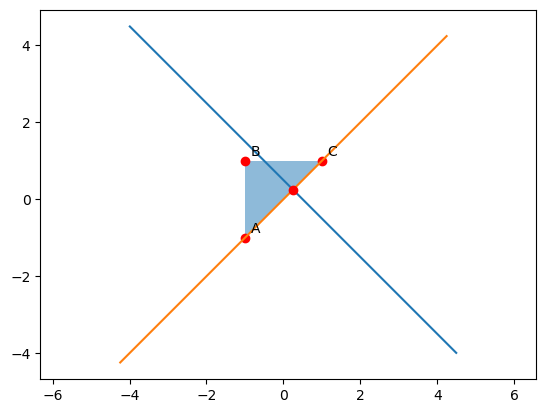

In [11]:
A = (-1*e1 - 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (1*e1 + 1*e2 + e0).dual()
draw(A, 'A')
draw(B, 'B')
draw(C, 'C')
draw([A, B, C])

L = 1*e1 + 1*e2 -0.5*e0
draw(L)

M = C & A
draw(M)

D = L ^ M
draw(D)

plt.axis('equal')

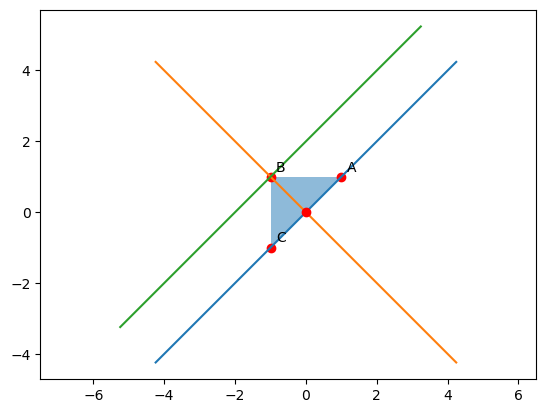

In [12]:
plt.axis('equal')

A = (1*e1 + 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (-1*e1 - 1*e2 + e0).dual()
draw(A, 'A')
draw(B, 'B')
draw(C, 'C')
draw([A, B, C])

AC = A & C
draw(A & C)

draw(AC | B)
draw((AC | B) / B)
#  | operator is left contraction, so i need a slighly different formula
draw(AC.inv() * (AC | B))

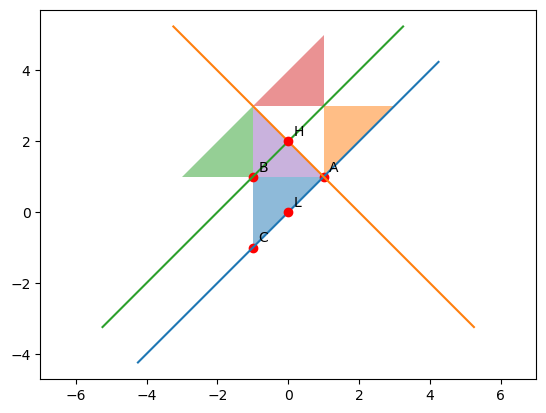

In [13]:
plt.axis('equal')

A = (1*e1 + 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (-1*e1 - 1*e2 + e0).dual()
draw(A, 'A')
draw(B, 'B')
draw(C, 'C')
draw([A, B, C])

L = A & C
draw(L, 'L')

draw(L | A)

# project L on B
draw((L | B) / B)

# project B on L
draw(L.inv() * (L | B))

p = L | A
draw([-1*p*X/p for X in [A, B, C]])

q = (L | B) / B
draw([-1*q*X/q for X in [A, B, C]])

H = q ^ (L | A)
draw(H, 'H')
draw([-1*H*X/H for X in [A, B, C]])


R = (B & A)/(B & L.inv() * (L | B))
draw([R*X/R for X in [A, B, C]])